In [1]:
import tensorflow as tf
import numpy as np
import random
import numpy as np
import matplotlib.pyplot as plt
import os
from six.moves import cPickle as pickle



from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, GlobalAveragePooling2D,BatchNormalization
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint


# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
print("the shape of X_train is",X_train.shape)
print("the shape of y_train is",y_train.shape)
num_classes = len(np.unique(y_train))
print("number of classes is",num_classes)

the shape of X_train is (50000, 32, 32, 3)
the shape of y_train is (50000, 1)
number of classes is 10


In [4]:
#One-hot encoding the labels


Y_train = np_utils.to_categorical(y_train, num_classes)
Y_test = np_utils.to_categorical(y_test, num_classes)


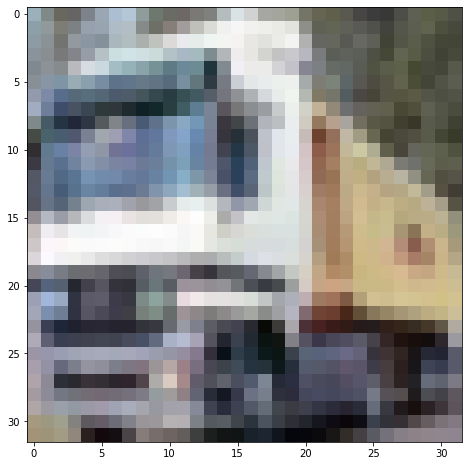

In [5]:
plt.imshow(X_train[1])

In [6]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu',input_shape = X_train[0].shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(GlobalAveragePooling2D())
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
batch_normalization (BatchNo (None, 6, 6, 32)          128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          1

In [7]:
"""loss='sparse_categorical_crossentropy',
metrics=[tf.keras.metrics.sparse_categorical_accuracy]"""
optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.1)
model.compile(loss="categorical_crossentropy",optimizer=optimizer,metrics=["accuracy"])


In [8]:
X_train= X_train/255
X_test = X_test/255

In [9]:

checkpointer =ModelCheckpoint(filepath='scratchmodel.best.hdf5', 
                               verbose=1,save_best_only=True)

In [10]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, 
          verbose=1, callbacks=[checkpointer], validation_split=0.2, shuffle=True)

Epoch 1/10
1246/1250 [============================>.] - ETA: 0s - loss: 2.6266 - accuracy: 0.1019
Epoch 00001: val_loss improved from inf to 2.33067, saving model to scratchmodel.best.hdf5
1250/1250 [==============================] - 10s 8ms/step - loss: 2.6256 - accuracy: 0.1019 - val_loss: 2.3307 - val_accuracy: 0.1014
Epoch 2/10
1244/1250 [============================>.] - ETA: 0s - loss: 2.3163 - accuracy: 0.1009
Epoch 00002: val_loss improved from 2.33067 to 2.30791, saving model to scratchmodel.best.hdf5
1250/1250 [==============================] - 9s 7ms/step - loss: 2.3163 - accuracy: 0.1008 - val_loss: 2.3079 - val_accuracy: 0.1014
Epoch 3/10
1246/1250 [============================>.] - ETA: 0s - loss: 2.3385 - accuracy: 0.1025
Epoch 00003: val_loss did not improve from 2.30791
1250/1250 [==============================] - 8s 7ms/step - loss: 2.3384 - accuracy: 0.1025 - val_loss: 2.3151 - val_accuracy: 0.1022
Epoch 4/10
1245/1250 [============================>.] - ETA: 0s - los

In [11]:
score = model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.3088 - accuracy: 0.1000


In [12]:
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), activation='relu',input_shape =  (32, 32, 3)))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(32, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(GlobalAveragePooling2D())
model1.add(Dense(10, activation='softmax'))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 64)               

In [13]:
opt = tf.keras.optimizers.Adam(learning_rate=0.1)
model1.compile(loss='binary_crossentropy', optimizer=opt,
              metrics=['accuracy'])

In [14]:
checkpointer =ModelCheckpoint(filepath='scratchmodel1.best.hdf5', 
                               verbose=1,save_best_only=True)

In [21]:

model1.fit(X_train, Y_train, batch_size=64, epochs=20, 
          verbose=1, callbacks=[checkpointer], validation_split=0.2, shuffle=True)

Epoch 1/20
622/625 [============================>.] - ETA: 0s - loss: 2.7630 - accuracy: 0.0993
Epoch 00001: val_loss improved from inf to 2.75393, saving model to scratchmodel2.best.hdf5
625/625 [==============================] - 11s 18ms/step - loss: 2.7624 - accuracy: 0.0994 - val_loss: 2.7539 - val_accuracy: 0.1022
Epoch 2/20
624/625 [============================>.] - ETA: 0s - loss: 2.7627 - accuracy: 0.0993
Epoch 00002: val_loss did not improve from 2.75393
625/625 [==============================] - 8s 13ms/step - loss: 2.7624 - accuracy: 0.0994 - val_loss: 2.7539 - val_accuracy: 0.1022
Epoch 3/20
624/625 [============================>.] - ETA: 0s - loss: 2.7626 - accuracy: 0.0994
Epoch 00003: val_loss did not improve from 2.75393
625/625 [==============================] - 8s 13ms/step - loss: 2.7624 - accuracy: 0.0994 - val_loss: 2.7539 - val_accuracy: 0.1022
Epoch 4/20
624/625 [============================>.] - ETA: 0s - loss: 2.7625 - accuracy: 0.0994
Epoch 00004: val_loss did

In [16]:
score = model1.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.7607 - accuracy: 0.1000
